In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from scipy import stats

In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
FIGURE_SIZE = (8, 6)

In [10]:
def plot_beta_prior_and_posterior(r, s, m, y, show_map=False, show_lmse=False):
    x = np.linspace(0, 1, 100)
    prior = stats.beta.pdf(x, r, s)
    posterior = stats.beta.pdf(x, r+y, s+m-y)
    if show_lmse:
        x_lmse = (r+y)/(r+s+m)
    else:
        x_lmse = None
        
    if show_map:
        x_map = (r + y -1) / (r + s + m - 2)
    else:
        x_map = None
    plot_prior_posterior(x, prior, posterior, (0, 1),
                         prior_label=f'Prior: Beta({r}, {s})',
                         posterior_label=f'Posterior: Beta({r+y}, {s+m-y})',
                         x_map=x_map, x_lmse=x_lmse)
    

def plot_gaussian_prior_and_posterior(μ_x, σ, ys, range_in_σs=3.5, show_map=False, show_lmse=False):
    n = len(ys)
    posterior_σ = np.sqrt(σ**2 / (n + 1))
    posterior_mean = 1/(n+1) * (np.sum(ys) + μ_x)
    
    
    # Compute range for plot
    posterior_min = posterior_mean - (range_in_σs * posterior_σ)
    posterior_max = posterior_mean + (range_in_σs * posterior_σ)
    prior_min = μ_x - (range_in_σs * σ)
    prior_max = μ_x + (range_in_σs * σ)
    
    xmin = min(posterior_min, prior_min)
    xmax = max(posterior_max, prior_max)
    x = np.linspace(xmin, xmax, 100)
    if show_lmse:
        x_lmse = posterior_mean
    else:
        x_lmse = None
        
    if show_map:
        x_map = posterior_mean
    else:
        x_map = None

    
    prior = stats.norm.pdf(x, μ_x, σ)
    posterior = stats.norm.pdf(x, posterior_mean, posterior_σ)
    
    
    plot_prior_posterior(x, prior, posterior, (xmin, xmax), 'Prior', 'Posterior',
                         x_map=x_map, x_lmse=x_lmse)
    
def plot_prior_posterior(x, prior, posterior, xlim, 
                         prior_label, posterior_label,
                         x_map=None, x_lmse=None):
    
    plt.figure(figsize=FIGURE_SIZE)
    plt.plot(x, prior, lw=3, color='gold', label = prior_label)
    plt.plot(x, posterior, lw=3, color='darkblue', label = posterior_label)
    if x_map is not None:
        map_index = np.argmin(np.abs(x - x_map))
        posterior_map = posterior[map_index]
        label = f'MAP estimate: {x_map:0.2f}'
        plt.plot([x_map, x_map], [0, posterior_map], '--', lw=2.5, color='black', label=label)
    if x_lmse is not None:
        lmse_index = np.argmin(np.abs(x - x_lmse))
        posterior_lmse = posterior[lmse_index]
        label = f'LMSE estimate: {x_lmse:0.2f}'
        plt.plot([x_lmse, x_lmse], [0, posterior_lmse], '--', lw=1.5, color='red', label=label)
    #plt.legend(bbox_to_anchor=(1.32, 1.02))
    plt.legend()
    ymax = max(max(prior[np.isfinite(prior)]), max(posterior[np.isfinite(posterior)]))
    plt.ylim(-0.3, ymax+0.1)
    plt.xlim(*xlim)
    plt.xlabel('$x$')
    plt.title('Prior $p(x)$ and posterior given observed data $y$ $p(x|y)$');

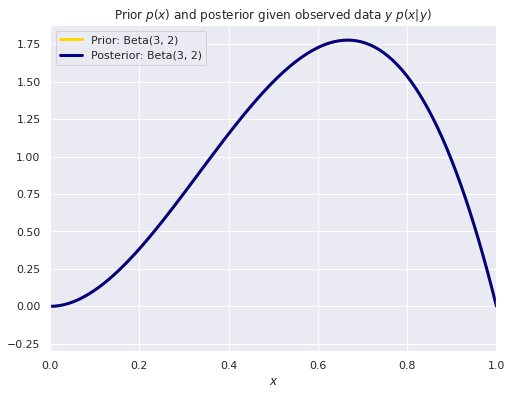

In [6]:
plot_beta_prior_and_posterior(3, 2, 0, 0) # alpha beta positive total
#plot_beta_prior_and_posterior(3, 2, 5, 5)

In [ ]:
#plot_beta_prior_and_posterior(100, 100, 5, 5)
#plot_beta_prior_and_posterior(1, 100, 5, 5)

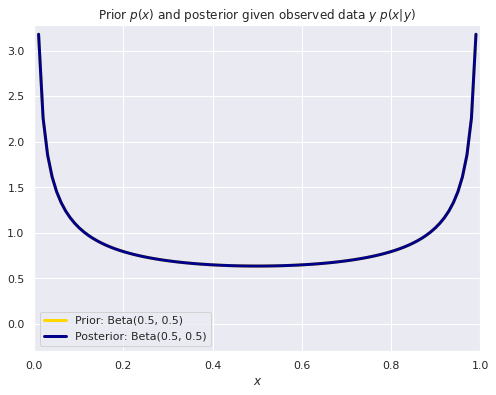

In [11]:
plot_beta_prior_and_posterior(0.5, 0.5, 0, 0)

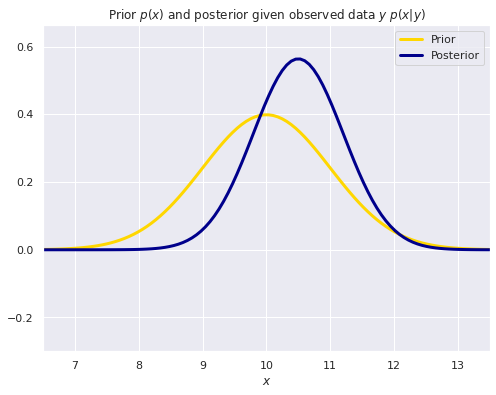

In [12]:
plot_gaussian_prior_and_posterior(10, 1, [11])

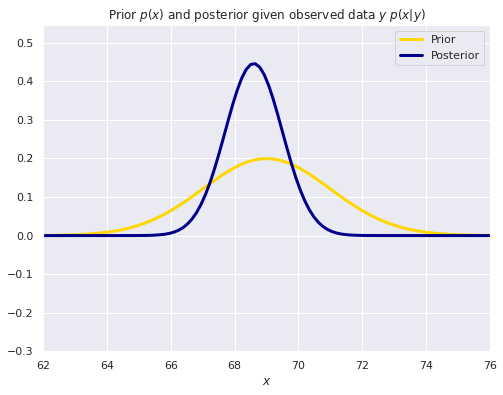

In [13]:
plot_gaussian_prior_and_posterior(5*12+9, 2, [5*12+6, 5*12+5, 6*12, 5*12+11])

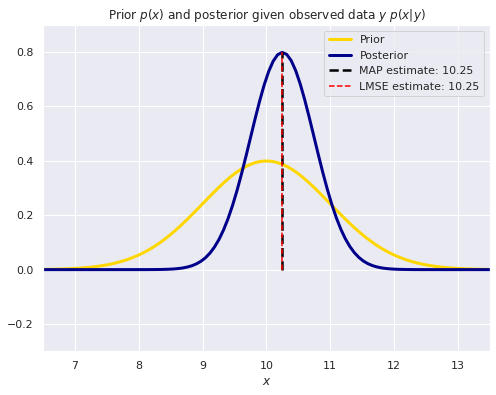

In [14]:
plot_gaussian_prior_and_posterior(10, 1, [11, 5, 15], show_map=True, show_lmse=True)

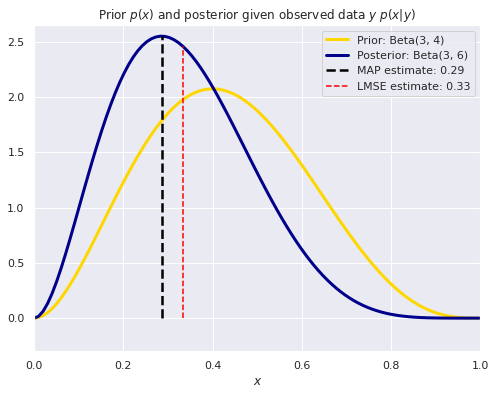

In [15]:
plot_beta_prior_and_posterior(3, 4, 2, 0, show_lmse=True, show_map=True)

In [ ]:
from datascience import *

In [ ]:
galton = Table.read_table('./galton.csv')
galton

In [ ]:
galton.hist('childHeight', bins=np.arange(55, 80, 1))

In [ ]:
galton.hist('childHeight', group='gender', bins=np.arange(55, 80, 1))